# Descripción del escenario

Este escenario 

# Descripción de las pruebas

La prueba que se ha realizado consiste en lanzar el comando iperf en cada host....
Este comando (definir lo que hace el comando)

# Visualización de la prueba

In [35]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from IPython.display import display, HTML
import matplotlib.pyplot as plt

In [36]:
# ubicación de los tests del escenario pequeño

path = "stage-small/"
path_test_1 = path + "iperfClientTest1.csv"
path_test_2 = path + "iperfClientTest2.csv"
path_test_3 = path + "iperfClientTest3.csv"

El siguiente paso es almacenar los datos del csv en una lista. Para ello, usamos la función `read_csv` que nos ofrece la librería pandas. Los parámetros que usamos en la llamada son:

- **encoding**: indica la codificación de caracteres del documento. En nuestro caso, `ISO-8859-1`
- **delimiter**: indica el delimitador de las columnas de datos, en nuestro caso, será una coma.
- **error_bad_libes**: con el valor a False obviamos los posibles errores en líneas que tengan datos diferentes a los que esperamos. Como las respuestas que nos da el servidor tienen más campos que las de los hosts deberemos añadir este parámetro.

In [37]:
data_test1 = pd.read_csv(path_test_1, encoding="ISO-8859-1", delimiter=',', error_bad_lines=False)
data_test2 = pd.read_csv(path_test_2, encoding="ISO-8859-1", delimiter=',', error_bad_lines=False)
data_test3 = pd.read_csv(path_test_3, encoding="ISO-8859-1", delimiter=',', error_bad_lines=False)

# mostramos la cabecera del fichero
data_test1.head()

b'Skipping line 38: expected 9 fields, saw 14\nSkipping line 40: expected 9 fields, saw 14\nSkipping line 42: expected 9 fields, saw 14\nSkipping line 44: expected 9 fields, saw 14\nSkipping line 82: expected 9 fields, saw 14\nSkipping line 84: expected 9 fields, saw 14\nSkipping line 86: expected 9 fields, saw 14\nSkipping line 88: expected 9 fields, saw 14\n'
b'Skipping line 38: expected 9 fields, saw 14\nSkipping line 40: expected 9 fields, saw 14\nSkipping line 42: expected 9 fields, saw 14\nSkipping line 44: expected 9 fields, saw 14\n'
b'Skipping line 38: expected 9 fields, saw 14\nSkipping line 40: expected 9 fields, saw 14\nSkipping line 42: expected 9 fields, saw 14\nSkipping line 44: expected 9 fields, saw 14\n'


,20201213225344,10.0.0.2,50722,10.0.0.1,5001,3,0.0-1.0,133770,1070160
0,20201213225344,10.0.0.3,34140,10.0.0.1,5001,3,0.0-1.0,133770,1070160
1,20201213225344,10.0.0.4,60798,10.0.0.1,5001,3,0.0-1.0,133770,1070160
2,20201213225344,10.0.0.5,53128,10.0.0.1,5001,3,0.0-1.0,133770,1070160
3,20201213225344,10.0.0.2,50722,10.0.0.1,5001,3,1.0-2.0,130830,1046640
4,20201213225344,10.0.0.3,34140,10.0.0.1,5001,3,1.0-2.0,130830,1046640


Como los datos obtenidos no tienen header, vamos a añadirle uno.
 

In [38]:
test_columns = ["Timestamp", "Local", "Port", "connected to", "Port", "ID","Intervalo","Transfer (bytes)", "Bandwidth (bits/s)"]
# insertamos los headers 
data_test1.columns=test_columns
data_test2.columns=test_columns
data_test3.columns=test_columns

# Mostramos la tabla del dataset en formato html...
display(HTML(data_test1.to_html()))

,Timestamp,Local,Port,connected to,Port,ID,Intervalo,Transfer (bytes),Bandwidth (bits/s)
0,20201213225344,10.0.0.3,34140,10.0.0.1,5001,3,0.0-1.0,133770,1070160
1,20201213225344,10.0.0.4,60798,10.0.0.1,5001,3,0.0-1.0,133770,1070160
2,20201213225344,10.0.0.5,53128,10.0.0.1,5001,3,0.0-1.0,133770,1070160
3,20201213225344,10.0.0.2,50722,10.0.0.1,5001,3,1.0-2.0,130830,1046640
4,20201213225344,10.0.0.3,34140,10.0.0.1,5001,3,1.0-2.0,130830,1046640
5,20201213225344,10.0.0.4,60798,10.0.0.1,5001,3,1.0-2.0,130830,1046640
6,20201213225344,10.0.0.5,53128,10.0.0.1,5001,3,1.0-2.0,130830,1046640
7,20201213225345,10.0.0.2,50722,10.0.0.1,5001,3,2.0-3.0,130830,1046640
8,20201213225345,10.0.0.3,34140,10.0.0.1,5001,3,2.0-3.0,130830,1046640
9,20201213225345,10.0.0.4,60798,10.0.0.1,5001,3,2.0-3.0,130830,1046640


Limpieza de datos

In [39]:
def clean_data(dataset, data_to_clean):
    return dataset.drop(data_to_clean,axis=1)


columns_to_remove = ["Timestamp", "Port", "connected to", "Port", "ID"]
# eliminamos las columnas que no nos interesan de los tres conjuntos de datos
clean_data1 = clean_data(data_test1, columns_to_remove)
clean_data2 = clean_data(data_test2, columns_to_remove)
clean_data3 = clean_data(data_test3, columns_to_remove)

#obtenemos los valores de cada uno

#test 1
data_values1 = clean_data1.values
x_axis_test1 = data_values1[:, 0]
x_axis_test1 = x_axis_test1.astype('str')

# x_axis = np.unique(x_axis)

y_axis_test1 = data_values1[:,0:4]
y_axis_test1 = y_axis_test1.astype('str')

# test 2
data_values2 = clean_data2.values
x_axis_test2 = data_values2[:, 0]
x_axis_test2 = x_axis_test2.astype('str')

# x_axis = np.unique(x_axis)

y_axis_test2 = data_values2[:,0:4]
y_axis_test2 = y_axis_test2.astype('str')

# test 3
data_values3 = clean_data3.values
x_axis_test3 = data_values3[:, 0]
x_axis_test3 = x_axis_test3.astype('str')

# x_axis = np.unique(x_axis)

y_axis_test3 = data_values3[:,0:4]
y_axis_test3 = y_axis_test3.astype('str')

# obtenemos los conjuntos de datos que deseamos para cada u no

# test 1
x_values_test1 = list(x_axis_test1)
intervals_test1 = list(y_axis_test1[:, 1])
transfer_test1 = list(y_axis_test1[:, 2])
badnwidth_test1 = list(y_axis_test1[:, 3])

print("CONJUNTOS DE DATOS DEL TEST 1")
print("Valores de los hosts ", x_values_test1)
print("\nIntervalos:  ", intervals_test1)
print("\nTransferencia: ", transfer_test1)
print("\nAncho de banda: ", badnwidth_test1)
print("-------------------------------------------------------\n")

x_size_test1 = np.arange(len(x_values_test1))


# test 1
x_values_test2 = list(x_axis_test2)
intervals_test2 = list(y_axis_test2[:, 1])
transfer_test2 = list(y_axis_test2[:, 2])
badnwidth_test2 = list(y_axis_test2[:, 3])

print("\nCONJUNTOS DE DATOS DEL TEST 2")
print("Valores de los hosts ", x_values_test2)
print("\nIntervalos:  ", intervals_test2)
print("\nTransferencia: ", transfer_test2)
print("\nAncho de banda: ", badnwidth_test2)
print("-------------------------------------------------------\n")

x_size_test2 = np.arange(len(x_values_test2))


# test 1
x_values_test3 = list(x_axis_test3)
intervals_test3 = list(y_axis_test3[:, 1])
transfer_test3 = list(y_axis_test3[:, 2])
badnwidth_test3 = list(y_axis_test3[:, 3])

print("\nCONJUNTOS DE DATOS DEL TEST 3")
print("Valores de los hosts ", x_values_test3)
print("\nIntervalos:  ", intervals_test3)
print("\nTransferencia: ", transfer_test3)
print("\nAncho de banda: ", badnwidth_test3)
print("-------------------------------------------------------\n")

x_size_test3 = np.arange(len(x_values_test3))





CONJUNTOS DE DATOS DEL TEST 1
Valores de los hosts  ['10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.3', '10.0.0.2', '10.0.0.4', '10.0.0.5', '10.0.0.3', '10.0.0.2', '10.0.0.5', '10.0.0.4', '10.0.0.3', '10.0.0.2', '10.0.0.5', '10.0.0.4', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.3', '10.0.0.5', '10.0.0.2', '10.0.0.4', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.3', '10.0.0.2', '10.0.0.4', '10.0.0.5', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.2', '10.0.0.3', '10.0.0.4', '10.0.0.5', '10.0.0.5', '10.0.0.2', '10.0.0.3', '10.0.0.4']

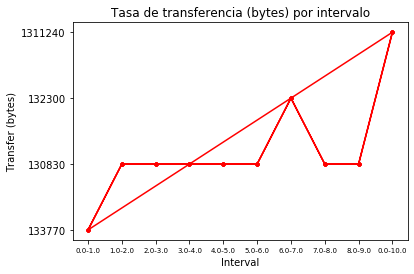

In [40]:
params = {'xtick.labelsize': 7, 'ytick.labelsize': 10}
mpl.rcParams.update(params)

plt.plot(intervals_test1, transfer_test1, 'r.-')
plt.title("Tasa de transferencia (bytes) por intervalo")
plt.ylabel("Transfer (bytes)")
plt.xlabel("Interval")
plt.show()

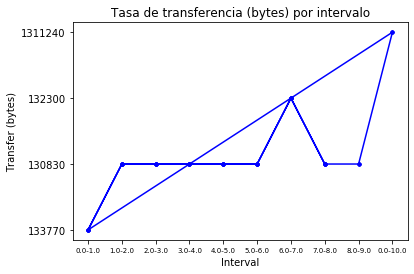

In [41]:
plt.plot(intervals_test2, transfer_test2, 'b.-')
plt.title("Tasa de transferencia (bytes) por intervalo")
plt.ylabel("Transfer (bytes)")
plt.xlabel("Interval")
plt.show()

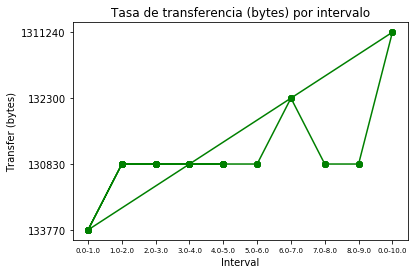

In [42]:
plt.plot(intervals_test3, transfer_test3, 'go-')
plt.title("Tasa de transferencia (bytes) por intervalo")
plt.ylabel("Transfer (bytes)")
plt.xlabel("Interval")
plt.show()

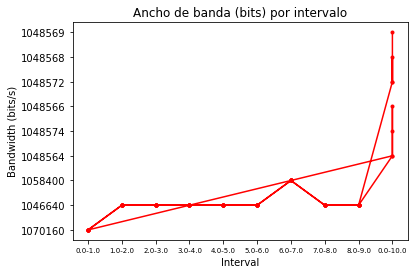

In [43]:
params = {'xtick.labelsize': 7, 'ytick.labelsize': 10}
mpl.rcParams.update(params)

plt.plot(intervals_test1, badnwidth_test1, 'r.-')
plt.title("Ancho de banda (bits) por intervalo")
plt.ylabel("Bandwidth (bits/s)")
plt.xlabel("Interval")
plt.show()


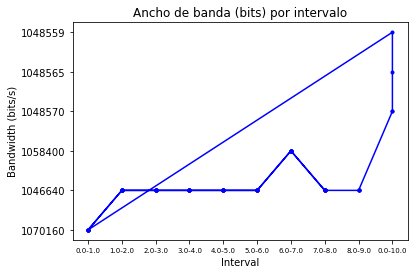

In [44]:
plt.plot(intervals_test2, badnwidth_test2, 'b.-')
plt.title("Ancho de banda (bits) por intervalo")
plt.ylabel("Bandwidth (bits/s)")
plt.xlabel("Interval")
plt.show()

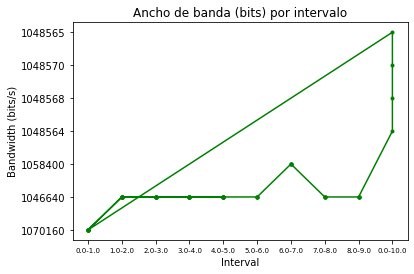

In [45]:
plt.plot(intervals_test3, badnwidth_test3, 'g.-')
plt.title("Ancho de banda (bits) por intervalo")
plt.ylabel("Bandwidth (bits/s)")
plt.xlabel("Interval")
plt.show()

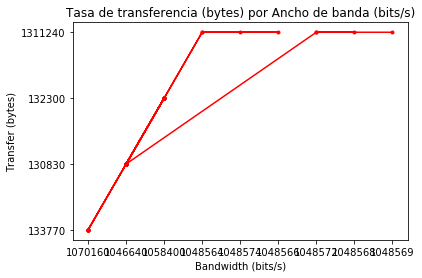

In [46]:
params = {'xtick.labelsize': 10, 'ytick.labelsize': 10}
mpl.rcParams.update(params)

plt.plot(badnwidth_test1,transfer_test1, 'r.-')
plt.title("Tasa de transferencia (bytes) por Ancho de banda (bits/s)")
plt.xlabel("Bandwidth (bits/s)")
plt.ylabel("Transfer (bytes)")
plt.show()


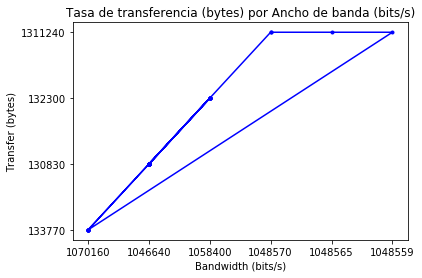

In [47]:
plt.plot(badnwidth_test2,transfer_test2, 'b.-')
plt.title("Tasa de transferencia (bytes) por Ancho de banda (bits/s)")
plt.xlabel("Bandwidth (bits/s)")
plt.ylabel("Transfer (bytes)")
plt.show()

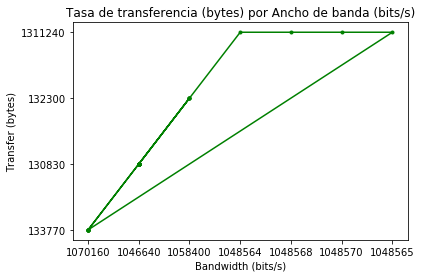

In [48]:
plt.plot(badnwidth_test3,transfer_test3, 'g.-')
plt.title("Tasa de transferencia (bytes) por Ancho de banda (bits/s)")
plt.xlabel("Bandwidth (bits/s)")
plt.ylabel("Transfer (bytes)")
plt.show()

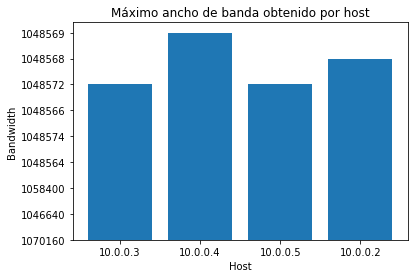

In [49]:
barlist = plt.bar(x_values_test1, badnwidth_test1)
barlist[1].set_color('r')
plt.title("Máximo ancho de banda obtenido por host")
plt.xlabel("Host")
plt.ylabel("Bandwidth")
plt.show()



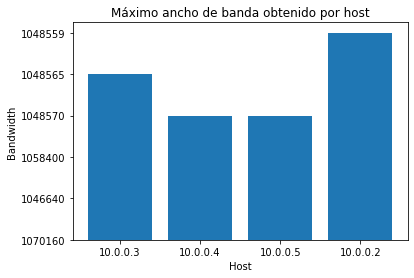

In [50]:
barlist = plt.bar(x_values_test2, badnwidth_test2)
barlist[1].set_color('r')
plt.title("Máximo ancho de banda obtenido por host")
plt.xlabel("Host")
plt.ylabel("Bandwidth")
plt.show()


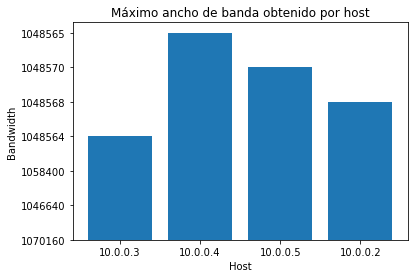

In [51]:
barlist = plt.bar(x_values_test3, badnwidth_test3)
barlist[1].set_color('r')
plt.title("Máximo ancho de banda obtenido por host")
plt.xlabel("Host")
plt.ylabel("Bandwidth")
plt.show()

